In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import chardet

In [2]:
df = pd.read_csv('amazon.csv', encoding='ISO-8859-1')

## Análise exploratória e preparação dos dados

In [3]:
# Verificando as informações dos dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [4]:
df.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [5]:
# Modificando os nomes das colunas para o português

novos_nomes = ['Ano', 'Estado', 'Mês', 'Quantidade', 'Data']
df.columns = novos_nomes

In [22]:
# Identificando se todos os anos apresentam os 12 meses

print(df.groupby('Ano')['Mês'].nunique())

Ano
1998    12
1999    12
2000    12
2001    12
2002    12
2003    12
2004    12
2005    12
2006    12
2007    12
2008    12
2009    12
2010    12
2011    12
2012    12
2013    12
2014    12
2015    12
2016    12
2017    11
Name: Mês, dtype: int64


In [6]:
# Verificando se existe cobertura em todos os meses e em todos os anos do intervalo

print(df['Mês'].unique())
print()
print(df['Ano'].unique())

['Janeiro' 'Fevereiro' 'Março' 'Abril' 'Maio' 'Junho' 'Julho' 'Agosto'
 'Setembro' 'Outubro' 'Novembro' 'Dezembro']

[1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017]


In [7]:
# Verificando a escrita e os estados presentes no Dataframe

print(df['Estado'].unique())

['Acre' 'Alagoas' 'Amapa' 'Amazonas' 'Bahia' 'Ceara' 'Distrito Federal'
 'Espirito Santo' 'Goias' 'Maranhao' 'Mato Grosso' 'Minas Gerais' 'Pará'
 'Paraiba' 'Pernambuco' 'Piau' 'Rio' 'Rondonia' 'Roraima' 'Santa Catarina'
 'Sao Paulo' 'Sergipe' 'Tocantins']


In [8]:
# Corrigindo o nome de estados

df['Estado'] = df['Estado'].replace('Piau', 'Piaui', regex=True)

df['Estado'] = df['Estado'].replace('Rio', 'Rio de Janeiro', regex=True)

In [9]:
# Criando a variavel região

estado_regiao = {
    'Acre': 'Norte', 'Alagoas': 'Nordeste', 'Amapa': 'Norte', 'Amazonas': 'Norte', 'Bahia': 'Nordeste',
    'Ceara': 'Nordeste', 'Distrito Federal': 'Centro-Oeste', 'Espirito Santo': 'Sudeste', 'Goias': 'Centro-Oeste',
    'Maranhao': 'Nordeste', 'Mato Grosso': 'Centro-Oeste', 'Mato Grosso do Sul': 'Centro-Oeste', 'Minas Gerais': 'Sudeste',
    'Pará': 'Norte', 'Paraiba': 'Nordeste', 'Parana': 'Sul', 'Pernambuco': 'Nordeste', 'Piaui': 'Nordeste',
    'Rio de Janeiro': 'Sudeste', 'Rio Grande do Norte': 'Nordeste', 'Rio Grande do Sul': 'Sul', 'Rondonia': 'Norte',
    'Roraima': 'Norte', 'Santa Catarina': 'Sul', 'Sao Paulo': 'Sudeste', 'Sergipe': 'Nordeste', 'Tocantins': 'Norte'
}

df['Região'] = df['Estado'].map(estado_regiao)

In [10]:
# Verificando os dados

df.sample(5)

,Ano,Estado,Mês,Quantidade,Data,Região
3565,2016,Paraiba,Novembro,132.0,2016-01-01,Nordeste
963,2004,Bahia,Janeiro,158.0,2004-01-01,Nordeste
3821,2013,Paraiba,Dezembro,155.0,2013-01-01,Nordeste
10,2008,Acre,Janeiro,0.0,2008-01-01,Norte
4658,2014,Rio de Janeiro,Junho,2.0,2014-01-01,Sudeste


## Visualização dos dados através de gráficos

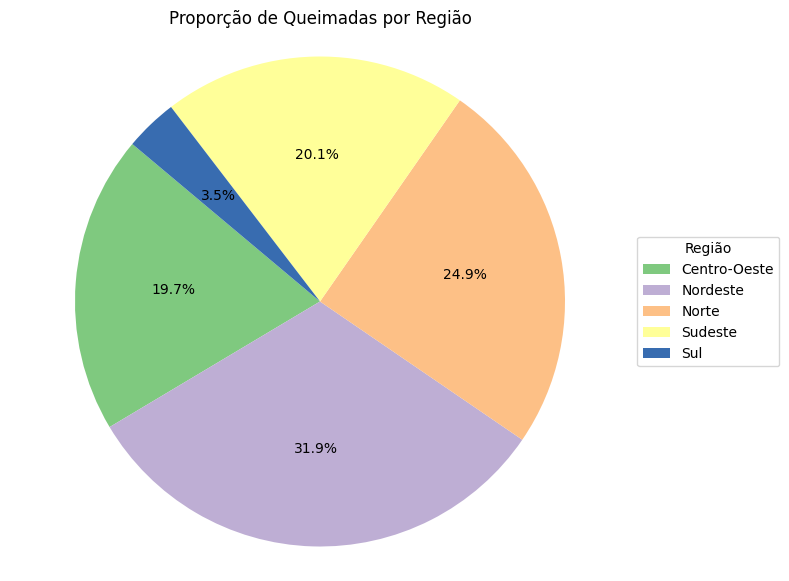

In [11]:
# Criando um gráfico de pizza

soma_por_regiao = df.groupby('Região')['Quantidade'].sum()
#cores = plt.cm.tab20.colors[:len(soma_por_regiao)]
cores = plt.get_cmap('Accent').colors[:len(soma_por_regiao)]

fig, ax = plt.subplots(figsize=(8, 7))
wedges, texts, autotexts = ax.pie(soma_por_regiao, autopct='%1.1f%%', startangle=140, colors=cores)

ax.legend(wedges, soma_por_regiao.index, loc="center left", bbox_to_anchor=(1, 0.5), title="Região")

plt.title('Proporção de Queimadas por Região')
plt.axis('equal')

plt.show()

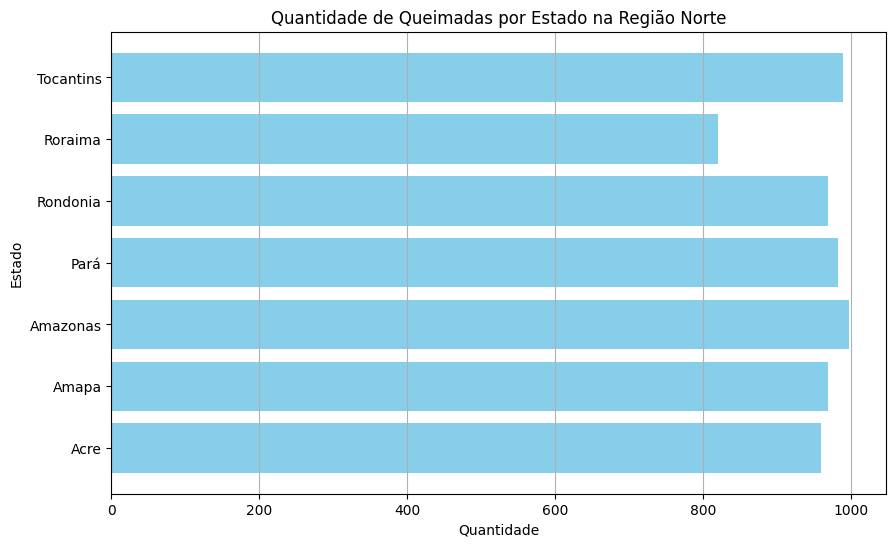

In [12]:
# Verificando o número de queimadas por estado da região norte

dados_norte = df[df['Região'] == 'Norte']

plt.figure(figsize=(10, 6))
plt.barh(dados_norte['Estado'], dados_norte['Quantidade'], color='skyblue')
plt.xlabel('Quantidade')
plt.ylabel('Estado')
plt.title('Quantidade de Queimadas por Estado na Região Norte')
plt.grid(axis='x')

plt.show()

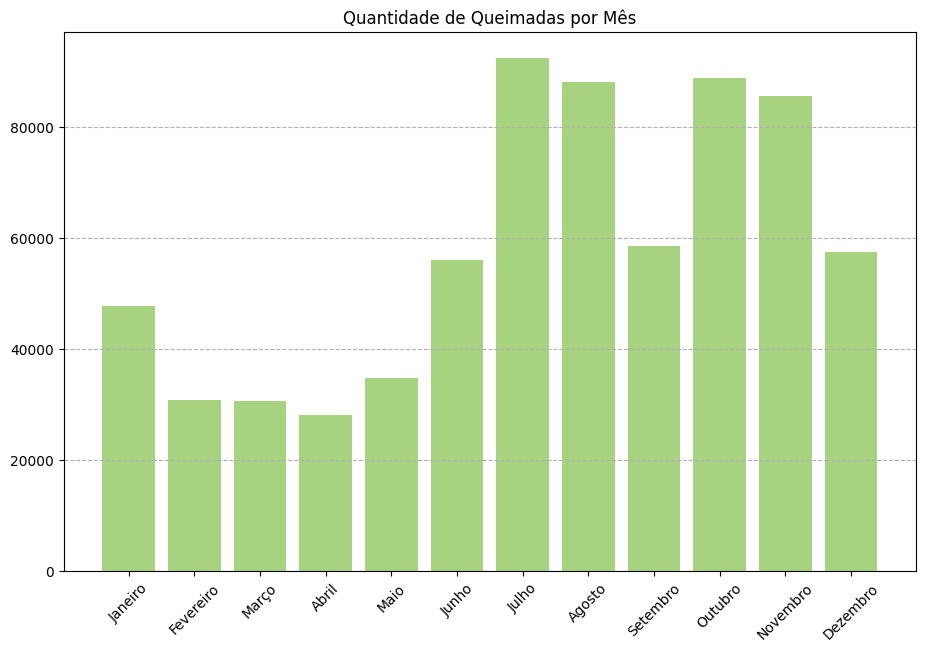

In [30]:
# Gráfico de barras indicando a incidência de queimadas por mês do ano

resultado_mes = df.groupby('Mês')['Quantidade'].sum()
meses_ordenados = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
quantidade_por_mes = resultado_mes.reindex(meses_ordenados)

plt.figure(figsize=(11, 7))
plt.bar(quantidade_por_mes.index, quantidade_por_mes.values, color='#A7D380')
plt.title('Quantidade de Queimadas por Mês')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

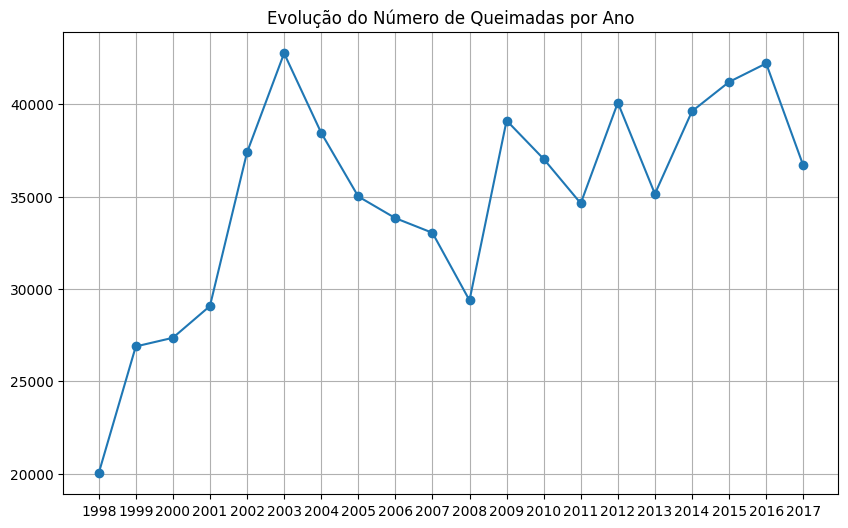

In [27]:
# Evolução do número de queimadas por ano

df['Ano'] = df['Ano'].astype(int)

# Calcular a soma da quantidade por ano
quantidade_por_ano = df.groupby('Ano')['Quantidade'].sum()

# Criar o gráfico de linha da evolução da quantidade por ano
plt.figure(figsize=(10, 6))
quantidade_por_ano.plot(marker='o', linestyle='-')
plt.xticks(quantidade_por_ano.index)
plt.xlabel('')
plt.title('Evolução do Número de Queimadas por Ano')
plt.grid(True)
plt.show()